In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 536.2 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=ab6ec0da5e59bcc9539c7fff5b41e7d2c1220c17f645c07516824ba795469835
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


Dataset shape: (1000, 10)
KMO Measure: 0.8798237573980986
Bartlett's Test chi-square value: 2897.184028588771
Bartlett's Test p-value: 0.0
Number of factors with Eigenvalue greater than 1: 2


/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


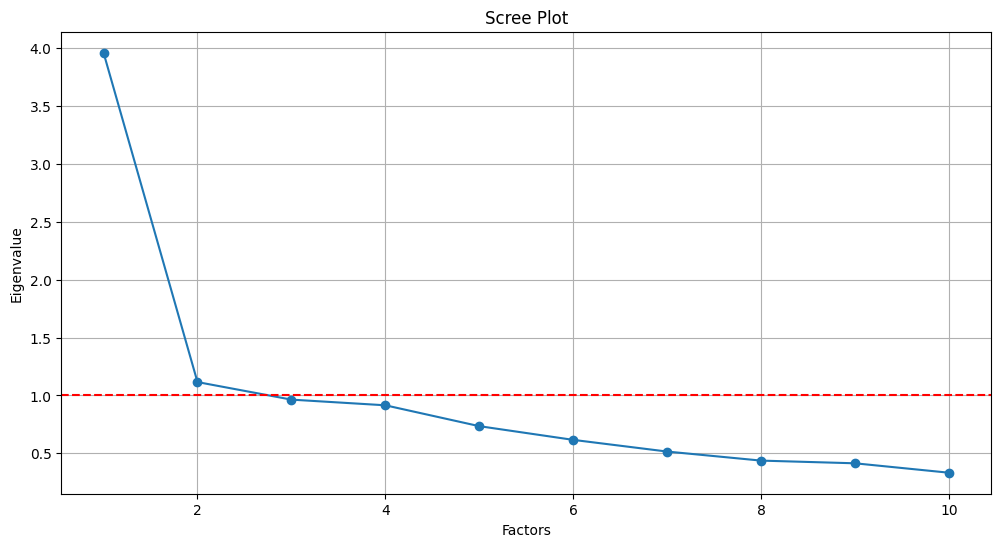

In [ ]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of observations and variables
num_observations = 1000
num_variables = 10

# Define the number of underlying factors
num_factors = 2

# Generate factor loadings matrix (num_variables x num_factors)
factor_loadings = np.random.rand(num_variables, num_factors)

# Generate factor scores for each observation (num_observations x num_factors)
factor_scores = np.random.randn(num_observations, num_factors)

# Generate unique variances for each variable (num_variables)
unique_variances = np.random.rand(num_variables)

# Generate the observed variables
observed_variables = np.dot(factor_scores, factor_loadings.T) + np.random.randn(num_observations, num_variables) * unique_variances

# Convert the continuous values to Likert scale (1 to 5)
likert_scale_observed_variables = np.clip(np.round((observed_variables - observed_variables.min()) / (observed_variables.max() - observed_variables.min()) * 4 + 1), 1, 5)

# Create a DataFrame
df = pd.DataFrame(likert_scale_observed_variables, columns=[
    'Product_Quality', 'Customer_Service', 'Value_for_Money', 'Delivery_Speed', 'Ease_of_Purchase',
    'User_Friendliness', 'Customer_Support', 'Return_Process', 'Overall_Satisfaction', 'Recommend_to_Others'
])

# Save the dataset to a CSV file
df.to_csv('efa_likert_dataset.csv', index=False)

# Display the shape of the dataset
print(f"Dataset shape: {df.shape}")

# Calculate KMO
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Measure: {kmo_model}")

# Calculate Bartlett's Test
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print(f"Bartlett's Test chi-square value: {chi_square_value}")
print(f"Bartlett's Test p-value: {p_value}")

# Perform Factor Analysis
fa = FactorAnalyzer(n_factors=df.shape[1], rotation=None)
fa.fit(df)

# Get Eigenvalues
ev, v = fa.get_eigenvalues()

# Kaiser’s Criterion (Eigenvalue Greater Than 1)
kaiser_criterion = np.sum(ev > 1)
print(f"Number of factors with Eigenvalue greater than 1: {kaiser_criterion}")

# Scree Test Plot
plt.figure(figsize=(12, 6))
plt.plot(range(1, df.shape[1] + 1), ev, marker='o', label='Actual Data')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()


Factor Loadings Before Rotation:
                      Factor_1  Factor_2
Product_Quality       0.825762 -0.212349
Customer_Service      0.742789  0.269172
Value_for_Money       0.378826  0.283955
Delivery_Speed        0.645008 -0.463206
Ease_of_Purchase      0.670860 -0.046077
User_Friendliness     0.685689 -0.505384
Customer_Support      0.610507  0.547921
Return_Process        0.305333  0.225026
Overall_Satisfaction  0.773581  0.013425
Recommend_to_Others   0.426173  0.306116

Factor Loadings After Oblimin Rotation:
                      Factor_1  Factor_2
Product_Quality       0.712949  0.255523
Customer_Service      0.225265  0.668343
Value_for_Money      -0.017721  0.480621
Delivery_Speed        0.825710 -0.083735
Ease_of_Purchase      0.464898  0.328070
User_Friendliness     0.889509 -0.101367
Customer_Support     -0.110204  0.860608
Return_Process       -0.010811  0.383720
Overall_Satisfaction  0.475909  0.441724
Recommend_to_Others  -0.007886  0.527990


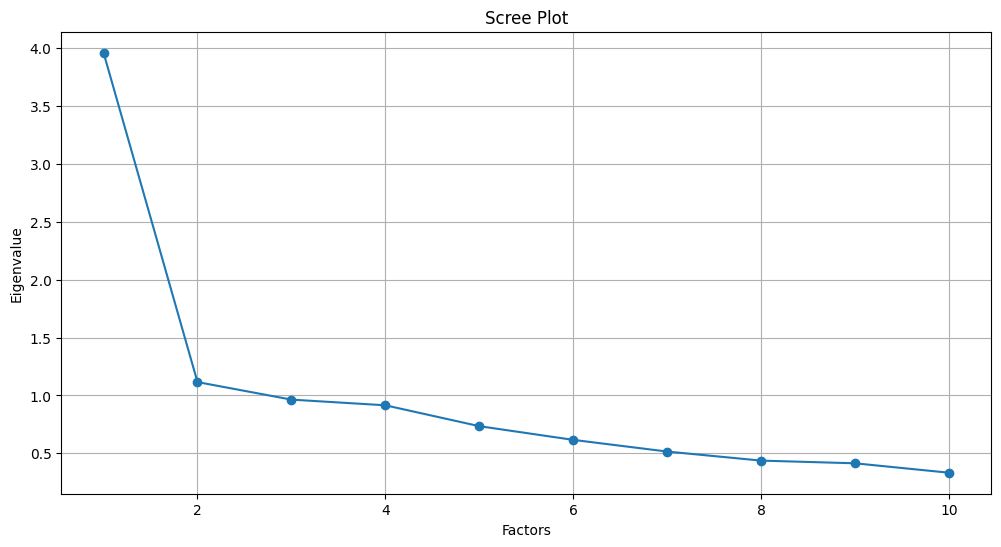

In [ ]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer, Rotator
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('efa_likert_dataset.csv')

# Perform Principal Axis Factoring (PAF) to extract factors
n_factors = 2
fa = FactorAnalyzer(n_factors=n_factors, rotation=None, method='principal')
fa.fit(df)

# Get factor loadings before rotation
loadings_before_rotation = fa.loadings_

# Print factor loadings before rotation
print("Factor Loadings Before Rotation:")
print(pd.DataFrame(loadings_before_rotation, index=df.columns, columns=[f'Factor_{i+1}' for i in range(n_factors)]))

# Perform oblimin rotation
rotator = Rotator(method='oblimin')
loadings_after_rotation = rotator.fit_transform(loadings_before_rotation)

# Print factor loadings after rotation
print("\nFactor Loadings After Oblimin Rotation:")
print(pd.DataFrame(loadings_after_rotation, index=df.columns, columns=[f'Factor_{i+1}' for i in range(n_factors)]))

# Scree Plot
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(12, 6))
plt.plot(range(1, df.shape[1] + 1), ev, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()
